In [1]:
# Install seaborn in case it's not already available in Colab
!pip install seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [3]:
# Upload the CSV file (use Colab's file uploader)
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]
df.columns = ["label", "message"]

# Preview
df.head()


Saving spam.csv to spam.csv


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Convert labels to numeric
df["label"] = df["label"].map({"ham": 0, "spam": 1})

# Check class distribution
df["label"].value_counts()


,count
label,
0,4825
1,747


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df["message"], df["label"], test_size=0.2, random_state=42
)


In [6]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [7]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [8]:
y_pred = model.predict(X_test_vec)


Accuracy: 0.9524663677130045

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



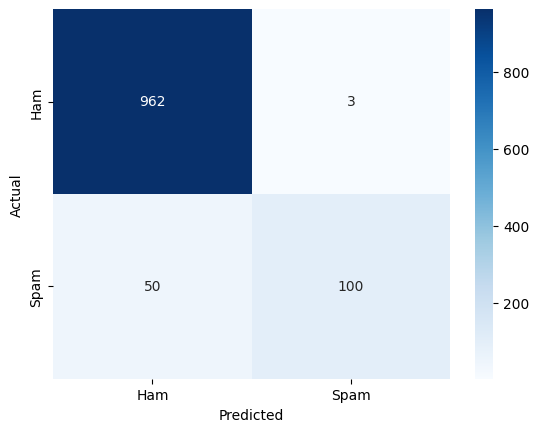

In [9]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
sample_msgs = [
    "Congratulations! You have won a free lottery ticket",
    "Let's meet for lunch tomorrow",
    "Urgent! Call this number to claim your prize",
    "Are you coming to the meeting?"
]
sample_vec = vectorizer.transform(sample_msgs)
predictions = model.predict(sample_vec)

for msg, pred in zip(sample_msgs, predictions):
    print(f"Message: {msg} --> {'Spam' if pred == 1 else 'Ham'}")


Message: Congratulations! You have won a free lottery ticket --> Spam
Message: Let's meet for lunch tomorrow --> Ham
Message: Urgent! Call this number to claim your prize --> Spam
Message: Are you coming to the meeting? --> Ham
